In [1]:
import tensorflow as tf
import os, sys
from google.colab import drive
drive.mount('/content/mnt')
nb_path = '/content/notebooks'
os.symlink('/content/mnt/My Drive/', nb_path)
sys.path.insert(0,nb_path)

Drive already mounted at /content/mnt; to attempt to forcibly remount, call drive.mount("/content/mnt", force_remount=True).


FileExistsError: ignored

In [2]:
!ls '/content/mnt/My Drive/datasets/horse-or-human'

horses	humans


In [3]:
# training Datasets
train_horse_dir = os.path.join('/content/mnt/My Drive/datasets/horse-or-human/horses')
train_human_dir = os.path.join('/content/mnt/My Drive/datasets/horse-or-human/humans')

In [4]:
# Validation Datasets
validation_horse_dir = os.path.join('/content/mnt/My Drive/datasets/validation-horse-or-human/horses')
validation_human_dir = os.path.join('/content/mnt/My Drive/datasets/validation-horse-or-human/humans')

In [5]:
print(train_horse_dir)
print(train_human_dir)

/content/mnt/My Drive/datasets/horse-or-human/horses
/content/mnt/My Drive/datasets/horse-or-human/humans


In [6]:
# Now its time to see the list inside the directory...

train_horse_name = os.listdir(train_horse_dir)
train_human_name = os.listdir(train_human_dir)

# Now we will see what are the first pictures of training horses and humans...

print(train_horse_name[:10])
print(train_human_name[:10])

# shape of the both of Horses and Humans images...

# print('The shape of Horses image is: ' + str(train_horse_name))
# print('The shape of Humans image is: ' + str(train_human_name))

# Now we will see what are the first pictures of validation horses and humans...

validation_horse_name = os.listdir(validation_horse_dir)
validation_horse_name = os.listdir(validation_human_dir)

print(validation_horse_name[:10])
print(validation_horse_name[:10])

['horse01-0.png', 'horse01-1.png', 'horse01-2.png', 'horse01-3.png', 'horse01-4.png', 'horse01-5.png', 'horse01-6.png', 'horse01-7.png', 'horse01-8.png', 'horse01-9.png']
['human01-00.png', 'human01-01.png', 'human01-02.png', 'human01-03.png', 'human01-04.png', 'human01-05.png', 'human01-06.png', 'human01-07.png', 'human01-08.png', 'human01-09.png']
['valhuman01-00.png', 'valhuman01-01.png', 'valhuman01-02.png', 'valhuman01-03.png', 'valhuman01-04.png', 'valhuman01-05.png', 'valhuman01-06.png', 'valhuman01-07.png', 'valhuman01-08.png', 'valhuman01-09.png']
['valhuman01-00.png', 'valhuman01-01.png', 'valhuman01-02.png', 'valhuman01-03.png', 'valhuman01-04.png', 'valhuman01-05.png', 'valhuman01-06.png', 'valhuman01-07.png', 'valhuman01-08.png', 'valhuman01-09.png']


In [7]:
# See the total length of the directory of both Horses and Humans...

print('Thie total length of training Horses Images are: ' , len(os.listdir(train_horse_dir)))
print('Thie total length of training Humans Images are: ' , len(os.listdir(train_human_dir)))

print('Thie total length of validation Horses Images are: ' , len(os.listdir(validation_horse_dir)))
print('Thie total length of validation Humans Images are: ' , len(os.listdir(validation_human_dir)))

Thie total length of training Horses Images are:  500
Thie total length of training Humans Images are:  527
Thie total length of validation Horses Images are:  128
Thie total length of validation Humans Images are:  128


In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as npimg

# we will configuration our image output in 4x4 matrixes
nrow = 4
ncol = 4

# iteriate start from 0

pic_index = 0

0


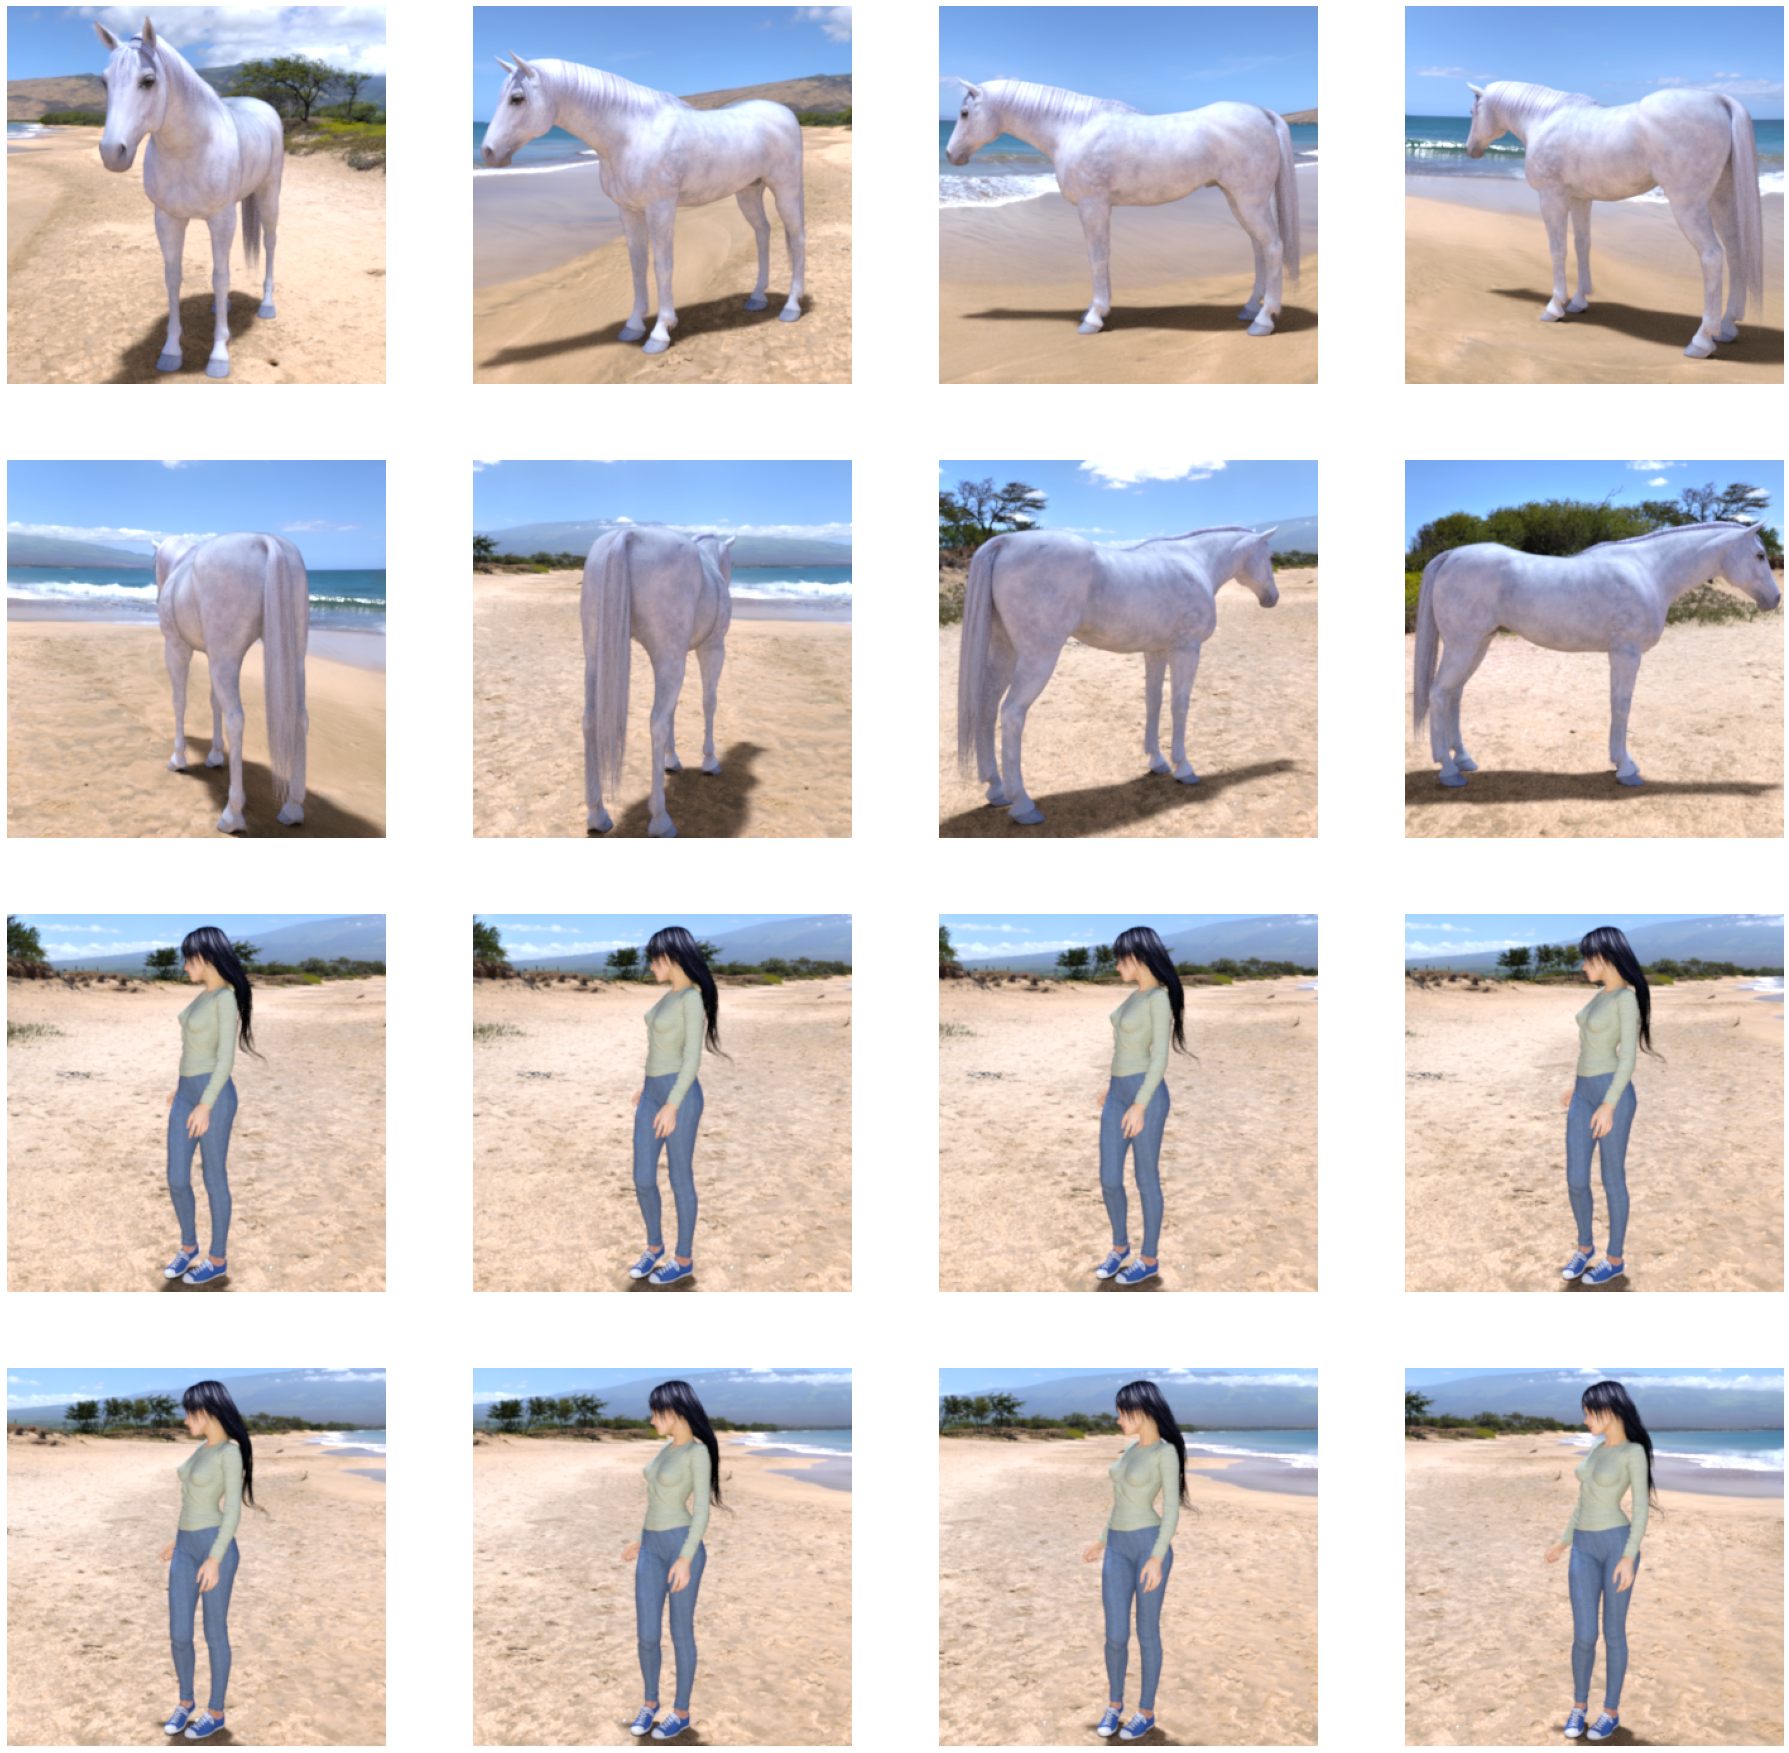

In [9]:
# assign matplotlib as 4x4 figure in order to see the output...

fig = plt.gcf()
fig.set_size_inches(ncol * 8, nrow * 8)

pic_index += 8

print(pic_index - 8)

next_horse_pixel = [os.path.join(train_horse_dir, fname) for fname in train_horse_name[pic_index - 8: pic_index]]

next_human_pixel = [os.path.join(train_human_dir, fname) for fname in train_human_name[pic_index - 8: pic_index]]

for i, img_path in enumerate(next_horse_pixel+next_human_pixel):
  # Set up the subplots and start to show the images from one (1)...

  sp = plt.subplot(nrow, ncol, i + 1)
  # Don't show any of the gulidlines...
  sp.axis('off')

  img = npimg.imread(img_path)
  plt.imshow(img)

plt.show()


# Let's train our model

In [10]:
model = tf.keras.Sequential([
   tf.keras.layers.Conv2D(16, (5,5), activation='relu', input_shape=(300,300,3)),
   tf.keras.layers.MaxPooling2D(2,2),
   tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
   tf.keras.layers.MaxPooling2D(2,2),     
   tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
   tf.keras.layers.MaxPooling2D(2,2),  
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(512, activation='relu'),
   tf.keras.layers.Dense(1, activation='sigmoid')                     
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 296, 296, 16)      1216      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 148, 148, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 78400)             0

In [12]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['acc'])

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All the images must be rescale in the [0, 1] range so that they can be easily be processable 

train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    '/content/mnt/My Drive/datasets/horse-or-human',
    target_size = (300, 300), # All images will be convert it into 150x150...
    batch_size = 128, 
    # Since, we are using binary_crossentropy then we will use 'binary class mode...
    class_mode='binary'
)

validation_datagen = ImageDataGenerator(rescale=1/255)

validation_generator = validation_datagen.flow_from_directory(
    '/content/mnt/My Drive/datasets/validation-horse-or-human',
    target_size = (300, 300), # All images will be convert it into 150x150...
    batch_size = 128, 
    # Since, we are using binary_crossentropy then we will use 'binary class mode...
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [14]:
class myCallbacks(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc') >= 0.960):
      self.model.stop_training = True

callbacks = myCallbacks()

history = model.fit_generator(
    train_generator,
    steps_per_epoch = 8,
    epochs = 15,
    verbose = 1,
    validation_data = validation_generator,
    validation_steps = 8,
    callbacks = [callbacks]
) 

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
8/8 [==============================] - 10s 1s/step - loss: 4.7871 - acc: 0.4961 - val_loss: 4.1892 - val_acc: 0.5000
Epoch 2/15
8/8 [==============================] - 11s 1s/step - loss: 1.2405 - acc: 0.6618 - val_loss: 0.8673 - val_acc: 0.5156
Epoch 3/15
8/8 [==============================] - 10s 1s/step - loss: 0.6181 - acc: 0.7820 - val_loss: 2.2080 - val_acc: 0.5000
Epoch 4/15
8/8 [==============================] - 10s 1s/step - loss: 0.4812 - acc: 0.7898 - val_loss: 2.3237 - val_acc: 0.5859
Epoch 5/15
8/8 [==============================] - 11s 1s/step - loss: 0.2485 - acc: 0.9032 - val_loss: 2.3379 - val_acc: 0.7031
Epoch 6/15
8/8 [==============================] - 10s 1s/step - loss: 0.9351 - acc: 0.7597 - val_loss: 1.0798 - val_acc: 0.7930
Epoch 7/15
8/8 [==============================] - 10s 1s/step - loss: 0.0890 - acc: 0.9722 - val_loss: 1.4014 - val_acc: 0.8047


In [15]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image

upload = files.upload()

for fn in upload.keys():

  # Predicting The images...
  path = '/content/' + fn

  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  print(x)
  x = np.expand_dims(x, axis=0)

  images = np.hstack([x])
  print(x)
  classes = model.predict(x, batch_size=20)
  print(classes[0])
  if classes[0] < 0.5:
    print('It is horse')
  else:
    print('It is Human')

Saving horse_01.jpg to horse_01.jpg
[[[ 70. 128. 174.]
  [ 76. 130. 174.]
  [ 81. 133. 173.]
  ...
  [103. 169. 204.]
  [102. 166. 202.]
  [101. 165. 201.]]

 [[ 70. 129. 173.]
  [ 76. 130. 174.]
  [ 80. 131. 174.]
  ...
  [104. 168. 204.]
  [103. 167. 203.]
  [102. 166. 202.]]

 [[ 71. 129. 175.]
  [ 77. 132. 173.]
  [ 80. 134. 178.]
  ...
  [105. 169. 205.]
  [105. 169. 205.]
  [104. 168. 204.]]

 ...

 [[113.  98.  29.]
  [ 97.  90.   9.]
  [ 95.  81.  10.]
  ...
  [ 79.  83.   6.]
  [101.  98.  27.]
  [109. 100.  23.]]

 [[119.  98.  31.]
  [112.  91.  28.]
  [113.  95.  21.]
  ...
  [ 76.  78.   3.]
  [117. 114.  35.]
  [119. 111.  39.]]

 [[123. 105.  29.]
  [116.  92.  32.]
  [112.  91.  24.]
  ...
  [ 83.  83.   9.]
  [105.  99.  23.]
  [110. 104.  30.]]]
[[[[ 70. 128. 174.]
   [ 76. 130. 174.]
   [ 81. 133. 173.]
   ...
   [103. 169. 204.]
   [102. 166. 202.]
   [101. 165. 201.]]

  [[ 70. 129. 173.]
   [ 76. 130. 174.]
   [ 80. 131. 174.]
   ...
   [104. 168. 204.]
   [103. 1

In [17]:
model.save('intro-to-tensorflow.h5')